In [179]:
import tensorflow as tf
from PIL import Image
import glob
import numpy as np


In [180]:
image_width = 64
image_height = 64
num_train_image =4000
num_test_image = 1000

dog_train_image_file_list = glob.glob("C:/Users/ndh83/Downloads/dog vs cat/dataset/training_set/dogs/*.jpg")
cat_train_image_file_list = glob.glob("C:/Users/ndh83/Downloads/dog vs cat/dataset/training_set/cats/*.jpg")

image_train_file_list = dog_train_image_file_list +cat_train_image_file_list

dog_test_image_file_list = glob.glob("C:/Users/ndh83/Downloads/dog vs cat/dataset/test_set/dogs/*.jpg")
cat_test_image_file_list = glob.glob("C:/Users/ndh83/Downloads/dog vs cat/dataset/test_set/cats/*.jpg")

image_test_file_list = dog_test_image_file_list +cat_test_image_file_list



In [181]:
def label_data(num_images):
    dogs_label =[0]*num_images
    cats_label =[1]*num_images
    image_label = dogs_label+ cats_label
    image_label=np.eye(2)[image_label]
    
    return image_label

def img_data(image_file_list):
    All_Img =[]
    for img in image_file_list:
        image = Image.open(img)
        image = image.resize((image_width, image_height))
        All_Img.append(np.float32(image))
    
    return All_Img

In [182]:
All_train_img = img_data(image_train_file_list)
All_test_img = img_data(image_test_file_list)

train_image_label = label_data(num_train_image)
test_image_label = label_data(num_test_image)

In [183]:
X = tf.placeholder(tf.float32, [None, image_width, image_height, 3])
Y = tf.placeholder(tf.float32, [None, 2])
keep_prob = tf.placeholder(tf.float32)


In [184]:
def Next_batch(num, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx=idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def Filter(X):
    W1 = tf.Variable(tf.random_normal([3,3,3,128], stddev = 0.01))
    b1 = tf.Variable(tf.constant(0.1, shape= [128]))
    L1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')+b1
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1, ksize= [1,2,2,1], strides = [1,2,2,1], padding= 'SAME')


    W2 = tf.Variable(tf.random_normal([3,3,128,64], stddev = 0.01))
    b2 = tf.Variable(tf.constant(0.1, shape= [64]))
    L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')+ b2
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.max_pool(L2, ksize= [1,2,2,1], strides = [1,2,2,1], padding= 'SAME')

    W3 = tf.Variable(tf.random_normal([3,3,64,32], stddev = 0.01))
    b3 = tf.Variable(tf.constant(0.1, shape= [32]))
    L3 = tf.nn.conv2d(L2, W3, strides = [1,1,1,1], padding = 'SAME')+b3
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3, ksize= [1,2,2,1], strides = [1,2,2,1], padding= 'SAME')

    W4 = tf.Variable(tf.random_normal([8*8*32,32], stddev = 0.01))
    b4 = tf.Variable(tf.constant(0.1, shape= [32]))
    L4 = tf.reshape(L3,[-1,8*8*32]) 
    L4 = tf.nn.relu(tf.matmul(L4,W4)+ b4)
    L4 = tf.nn.dropout(L4, keep_prob)

    W5 = tf.Variable(tf.random_normal([32,2], stddev =0.01))
    model = tf.matmul(L4,W5)
    
    return model

In [185]:
model = Filter(X)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model , labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

predict = tf.argmax(model,1)
original = tf.argmax(Y,1)
is_correct = tf.equal(predict, original)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [187]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(2500):
    batch = Next_batch(128, All_train_img, train_image_label)

    if i% 500 ==0:
        cost_ = sess.run(cost, feed_dict= {X: batch[0], Y: batch[1], keep_prob: 0.8})
        print("step: {}, cost: {}".format(i,cost_))

    sess.run(optimizer, feed_dict= {X: batch[0], Y: batch[1], keep_prob: 0.8})


step: 0, cost: 0.6931172609329224
step: 500, cost: 0.7099446654319763
step: 1000, cost: 0.5780957937240601
step: 1500, cost: 0.38386648893356323
step: 2000, cost: 0.3702723979949951


In [237]:
Accuracy =0.0
for i in range(10):
    batch = Next_batch(280, All_test_img, test_image_label)
    Accuracy+=sess.run(accuracy, feed_dict={X:batch[0], Y:batch[1] , keep_prob:1})

Accuracy = Accuracy/10
print('정확도: {}'.format(Accuracy))

정확도: 0.7025000095367432


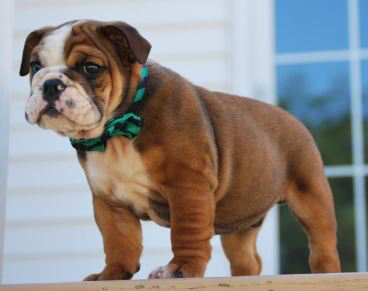

In [235]:
image_check= Image.open("C:/Users/ndh83/Desktop/image.jpg")
image_check


In [236]:
image_check= image_check.resize((image_width, image_height))
Img = []
Img.append(np.float32(image_check))

model_= sess.run(model, feed_dict={X:Img, keep_prob:1})
prediction= sess.run(predict, feed_dict={X:Img, keep_prob:1})
if prediction == [0]:
    print("It is dog!")
else:
    print("It is cat!")
print("Percentage: {}".format(prediction))
print(model_)

It is dog!
Percentage: [0]
[[ 0.5841125 -0.7817706]]
